In [ ]:
import os
import sys
import numpy as np
import pandas as pd
import matplotlib as mlp
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
mlp.style.use("seaborn")
import statsmodels.formula.api as smf
import statsmodels.api as sm
from datetime import datetime as dt
import warnings
warnings.filterwarnings("ignore")
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
from statsmodels.tools.eval_measures import rmse, aic
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from dieboldmariano import dm_test

In [ ]:
df = pd.read_excel("...CAPE/ie_data.xls", sheet_name="Data", skiprows=7)
df.drop(df.tail(1).index, inplace=True) 
df['Date'] = pd.to_datetime(df['Date']*100, format='%Y%m')
df=df.set_index(['Date'])

#**CAPE - Univariate**

In [ ]:
ie_data = df[["P", "CAPE", "TR CAPE", "Yield", "Real Return", "Real Return.1", "Returns.2"]].copy()
ie_data.rename(columns={"P": "S&P", "Yield": "Excess_CAPE_Yield", "Real Return": "Real_10YReturns_Equity", "Real Return.1": "10Y_Real_Returns_Bond", "Returns.2": "10Y_Excess_Real_Returns_Equity"}, inplace=True)

In [ ]:
ie_data['inCAPE']=1/ie_data['CAPE']
ie_data['Log_CAPE']=np.log(ie_data['CAPE'])
ie_data['Log_inCAPE']=np.log(1/ie_data['CAPE'])
ie_data.head()

,S&P,CAPE,TR CAPE,Excess_CAPE_Yield,Real_10YReturns_Equity,10Y_Real_Returns_Bond,10Y_Excess_Real_Returns_Equity,inCAPE,Log_CAPE,Log_inCAPE
Date,,,,,,,,,,
1881-01-01,6.19,18.473952,24.135057,-0.010489,0.045353,0.056468,-0.011115,0.054130,2.916362,-2.916362
1881-02-01,6.17,18.147258,23.655503,-0.011393,0.046774,0.056199,-0.009425,0.055105,2.898519,-2.898519
1881-03-01,6.24,18.270119,23.767713,-0.013123,0.042423,0.054885,-0.012462,0.054734,2.905267,-2.905267
1881-04-01,6.22,17.950108,23.308850,-0.007504,0.045971,0.054635,-0.008665,0.055710,2.887596,-2.887596
1881-05-01,6.5,18.869719,24.456686,-0.008881,0.041157,0.054786,-0.013628,0.052995,2.937558,-2.937558


In [ ]:
reg_data = ie_data[['CAPE','inCAPE','Log_CAPE','Log_inCAPE','Real_10YReturns_Equity']].dropna()

## Plot

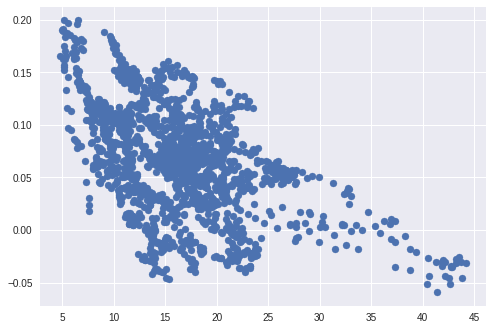

In [ ]:
plt.scatter(reg_data['CAPE'],reg_data['Real_10YReturns_Equity'])
plt.show()

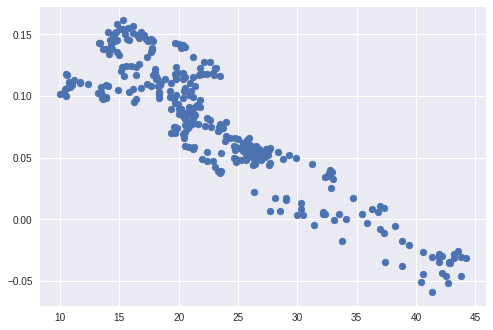

In [ ]:
reg_data_after=reg_data[reg_data.index.year>=1985]
plt.scatter(reg_data_after['CAPE'],reg_data_after['Real_10YReturns_Equity'])
plt.show()

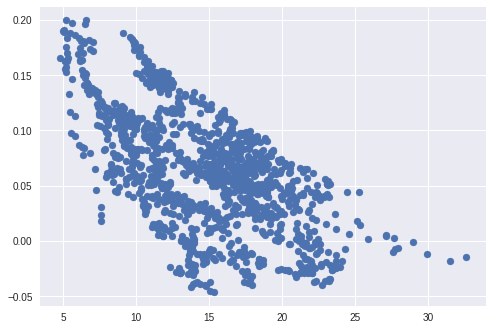

In [ ]:
reg_data_before=reg_data[reg_data.index.year<1985]
plt.scatter(reg_data_before['CAPE'],reg_data_before['Real_10YReturns_Equity'])
plt.show()

## Regression

10-Year-ahead real stock returns at beginning year

In [ ]:
def regCAPE(df):
  results = smf.ols("Real_10YReturns_Equity ~ CAPE", data=df ).fit()
  return results.params

In [ ]:
T=240
reg_data['pred10Y_CAPE_R']=np.nan
for t in range(T, len(reg_data)):
  regt = reg_data.iloc[:(t-120)]
  regout = regCAPE(regt)
  reg_data['pred10Y_CAPE_R'].iloc[t] = regout[0] + regout[1] * reg_data['CAPE'].iloc[t]

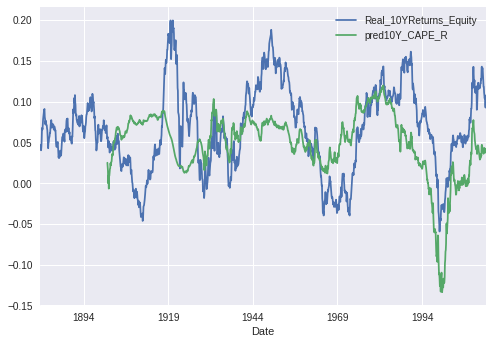

In [ ]:
reg_data[['Real_10YReturns_Equity','pred10Y_CAPE_R']].plot()

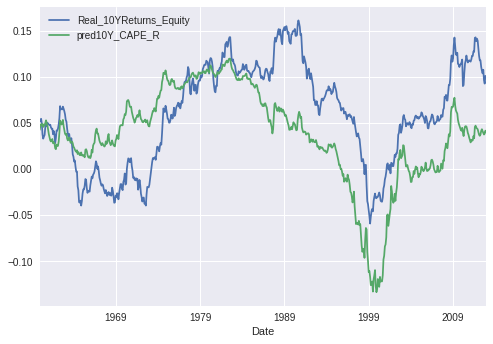

In [ ]:
reg_data[reg_data.index.year>=1960][['Real_10YReturns_Equity','pred10Y_CAPE_R']].plot()